In [24]:
import pandas as pd
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt


df = pd.read_csv("T_games_dataset.csv")
df.head(1)

id    client_id   order_day  category_id category_name  good_id  \
0  1500571355  5-25R6ZT3L9  2023-05-22        29688        Скидки   890257   

                 good_name  good_price  good_cnt gender_cd  age  \
0  The Night of the Rabbit       299.0       1.0         M   28   

  education_level city_nm  monthly_income_amt  steam_popularity_score  
0             UGR  Москва               73552                     0.0

In [25]:
from datetime import datetime

df["weekday"] = df.order_day.apply(lambda x: datetime.strptime(x, "%Y-%m-%d").weekday()).map({
    0: "Пн",
    1: "Вт",
    2: "Ср",
    3: "Чт",
    4: "Пт",
    5: "Сб",
    6: "Вс"
})

In [26]:
start_date = datetime.strptime(df.order_day.min(), "%Y-%m-%d")

def get_week_number(date: str) -> int:
    return (datetime.strptime(date, "%Y-%m-%d") - start_date).days // 7

df["week_number"] = df.order_day.apply(get_week_number)

In [50]:
r = df.groupby(["week_number", "weekday"]).good_price.sum().reset_index()
r.head(33)

week_number weekday  good_price
0             0      Вс      128.75
1             0      Вт     1800.30
2             0      Пн      394.17
3             0      Пт      744.30
4             0      Ср     4342.80
5             1      Вс      921.45
6             1      Вт      129.65
7             1      Пн      170.20
8             1      Пт     1960.43
9             1      Сб     2804.20
10            1      Ср     1000.65
11            1      Чт     4403.41
12            2      Вс     5547.65
13            2      Вт     1360.35
14            2      Пн     2598.35
15            2      Пт     1739.40
16            2      Сб    25346.65
17            2      Ср     4324.60
18            2      Чт     4134.15
19            3      Вс    24985.90
20            3      Вт     6697.60
21            3      Пн    10469.70
22            3      Пт     5685.05
23            3      Сб    15921.00
24            3      Ср    17706.55
25            3      Чт    21827.50
26            4      Вс    12018.62
27            4      Вт       18.75
28            4      Пн    13158.39
29            4      Пт    16061.91
30            4      Сб    17797.16
31            4      Ср    13295.30
32            4      Чт    17515.84

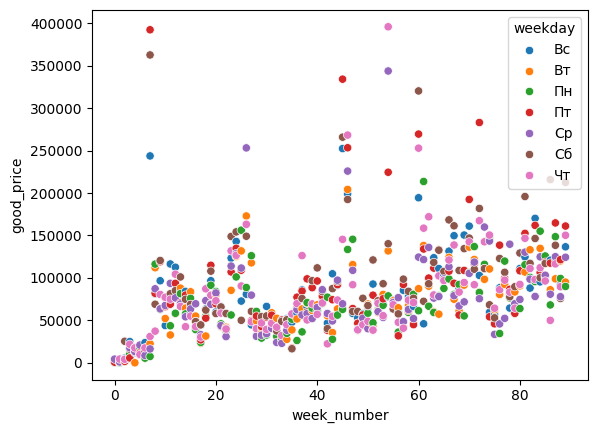

In [28]:
sns.scatterplot(r, x="week_number", y="good_price", hue="weekday")

plt.show()

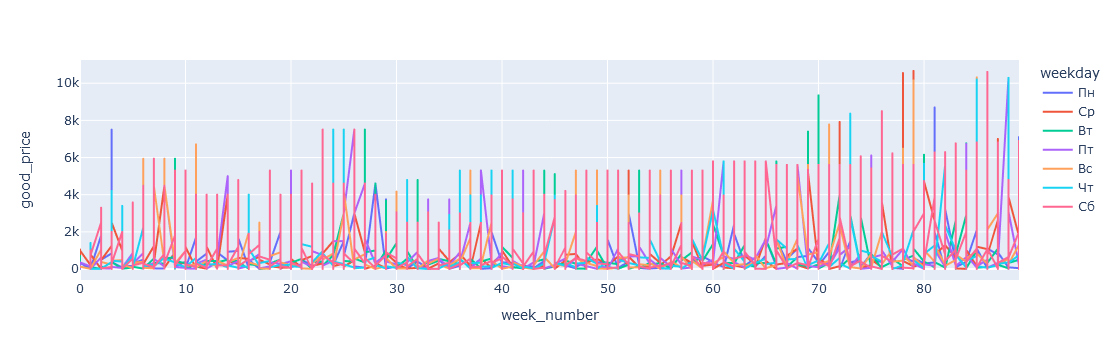

In [29]:
fig = px.line(df.sort_values("week_number"), x="week_number", y="good_price", color="weekday", hover_name="order_day")

fig.show()

In [51]:
r = df.groupby(["week_number", "weekday"]).good_price.sum().reset_index()
r.loc[r.groupby("week_number").good_price.idxmin()].weekday.value_counts()

weekday
Сб    28
Вс    14
Пн    13
Пт    11
Чт    10
Ср     9
Вт     5
Name: count, dtype: int64